In [9]:
import numpy as np
import math
from qiskit import *
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit import Gate

In [39]:
qc = QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";
qreg q[24];
creg c[2];
rz(0.019629) q[23];
rz(-0.019629) q[23];
sdg q[15];
sdg q[10];
h q[15];
h q[10];
cx q[15], q[23];
cx q[10], q[23];
rz(1.570796) q[23];
rx(-0.451020) q[23];
rz(-1.570796) q[23];
cx q[10], q[23];
h q[10];
cx q[15], q[23];
s q[10];
h q[15];
rz(1.570796) q[23];
rx(0.451020) q[23];
rz(4.712389) q[23];
h q[10];
s q[15];
rz(1.444471) q[23];
rz(-1.444471) q[23];
sdg q[10];
h q[15];
h q[10];
sdg q[15];
h q[15];
cx q[15], q[23];
cx q[10], q[23];
rz(1.570796) q[23];
rx(-0.451020) q[23];
rz(-1.570796) q[23];
cx q[10], q[23];
h q[10];
cx q[15], q[23];
h q[10];
h q[15];
rz(1.570796) q[23];
rx(0.451020) q[23];
rz(-1.570796) q[23];
s q[10];
h q[15];
s q[15];
measure q[23] -> c[0];
measure q[23] -> c[1];
""")

In [48]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)
shots = 1
experiment = simulator.run(circ, shots=shots, memory = True).result()
memory = experiment.get_memory(circ)
measurement = np.array([list(map(int, reversed(string))) for string in memory])
print(measurement)

[[0 0]
 [1 1]]


Original Quantum Circuit:


/Users/luciavilchez/anaconda3/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


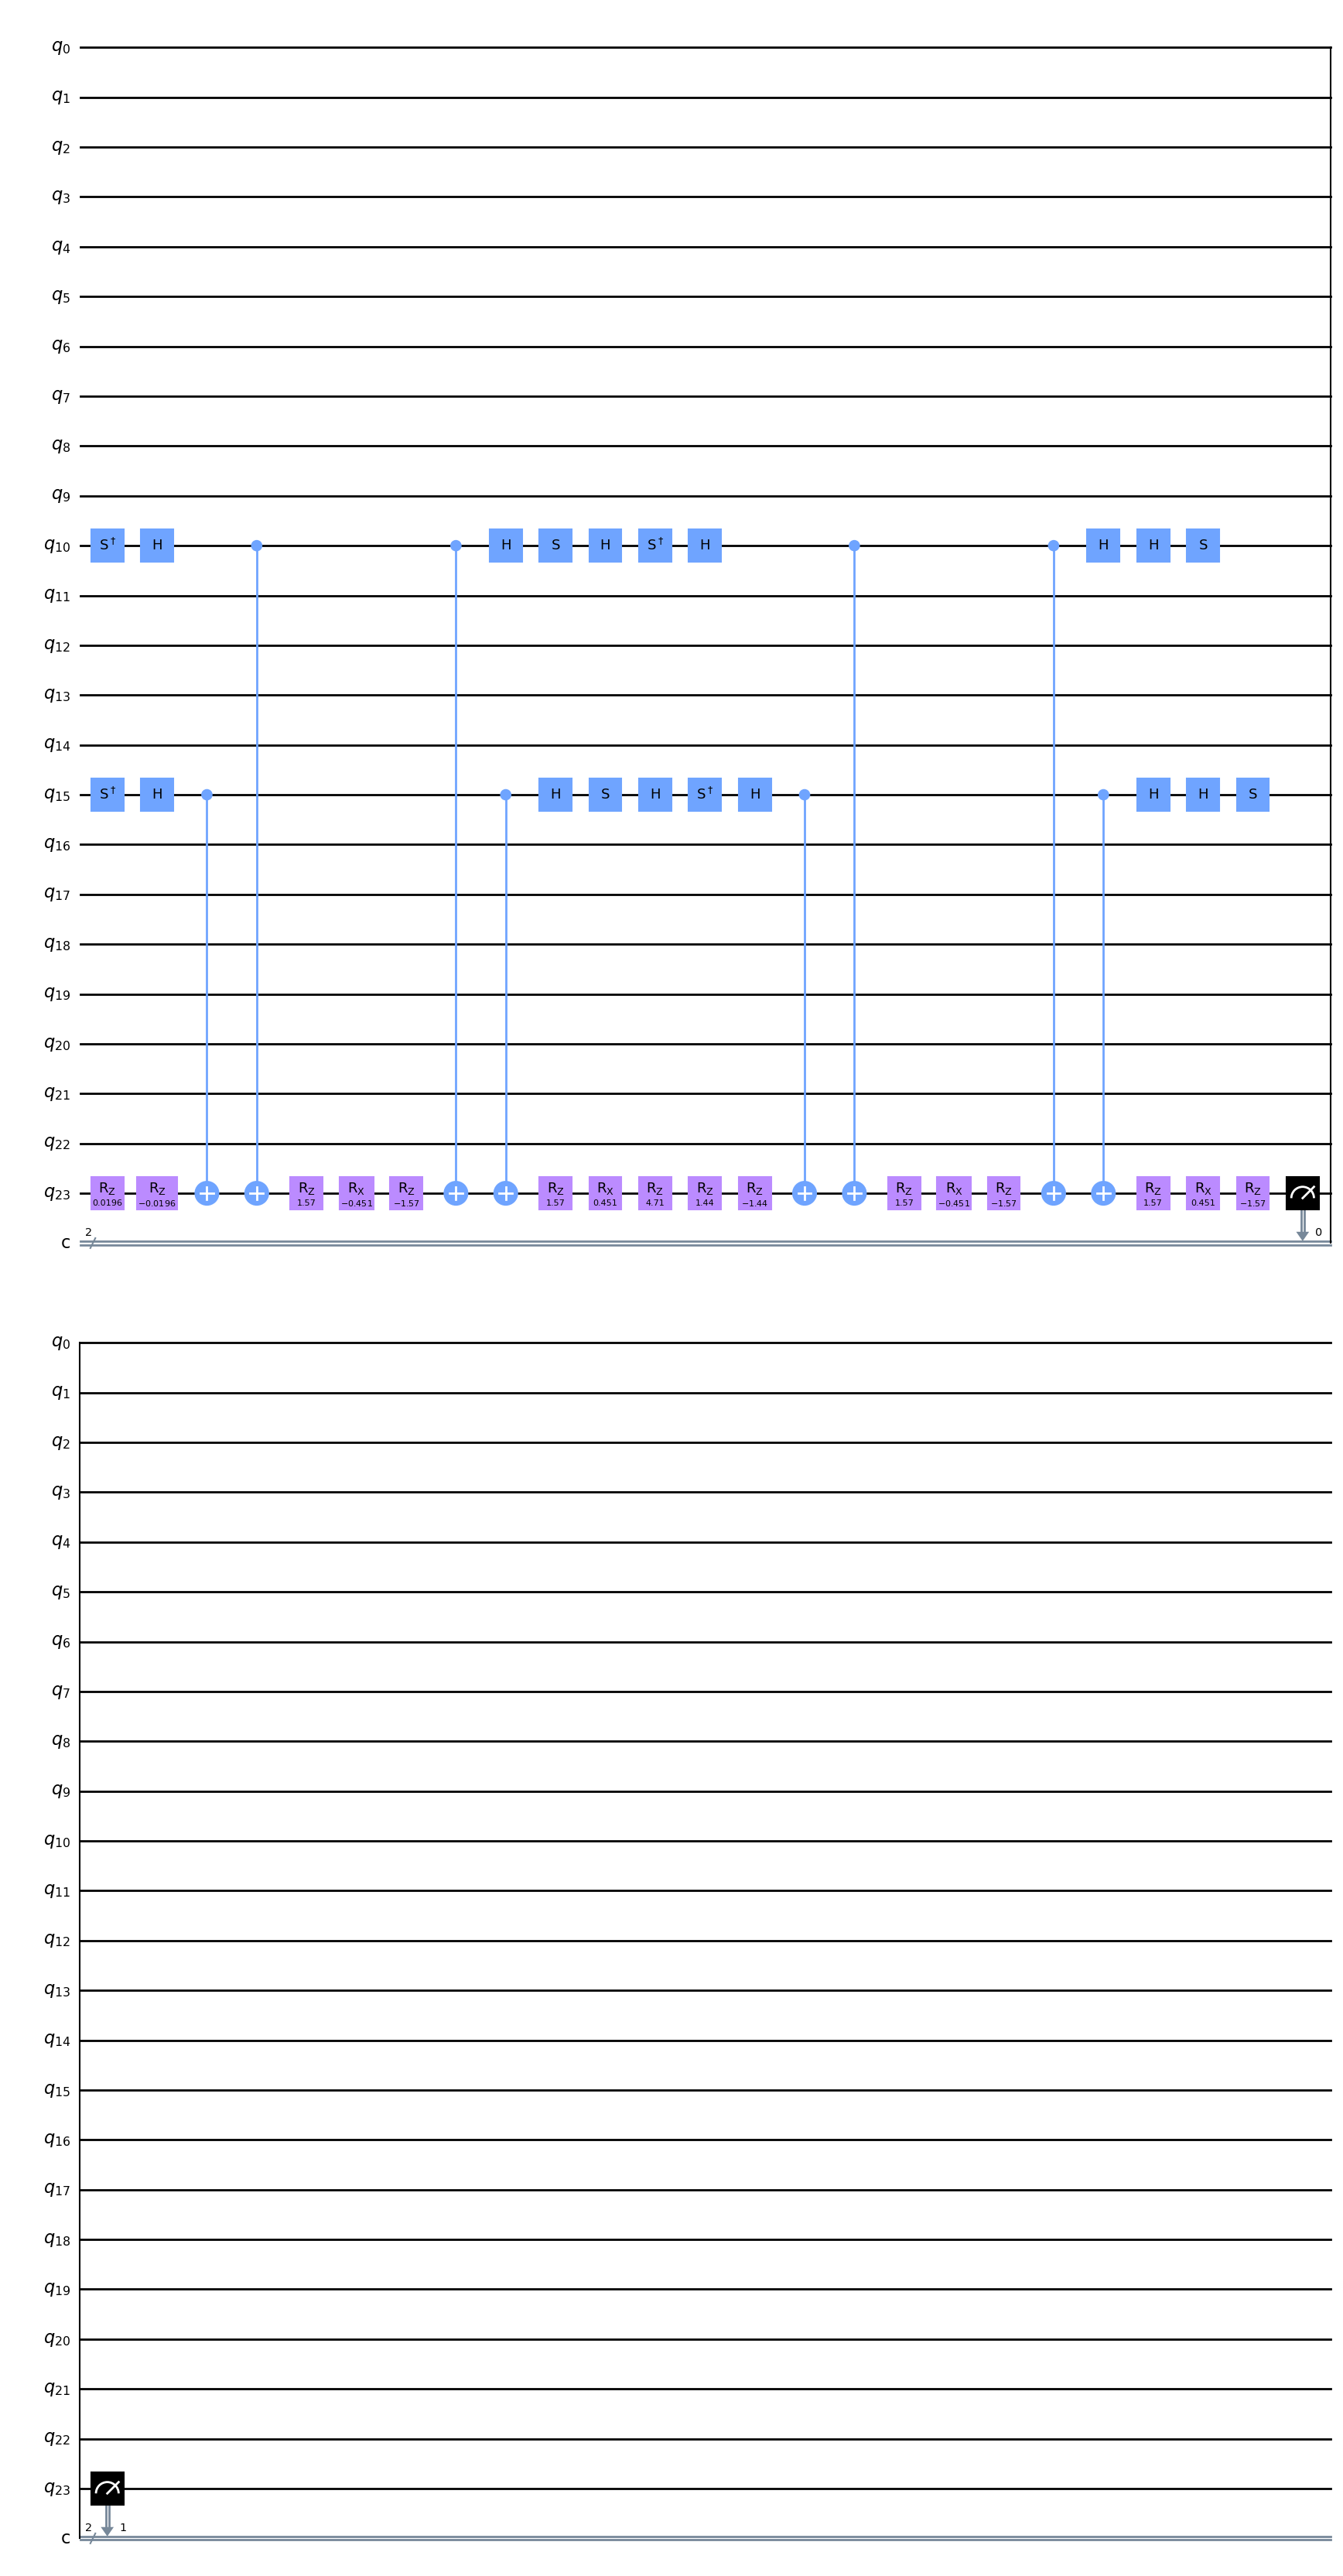

In [40]:
# Print the circuit
qc.draw('mpl')

array([[0, 0],
       [1, 1]])